In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Exploring Cell Concentration data

Reading data

In [3]:
cell_concentration = pd.read_csv('./data/raman_data.csv')

Lets Check how the data looks

In [61]:
cell_concentration.sample(5)

,condition,631.73,633.93,636.13,638.32,640.52,642.72,644.92,647.11,649.31,...,3102.06,3103.8,3105.54,3107.28,3109.02,3110.76,3112.5,3114.23,3115.97,3117.71
93,0.5mM,4952.112526,4879.401950,4859.288230,4799.462245,4800.109385,4729.696723,4686.254106,4613.971784,4703.713655,...,2809.317198,2731.282874,2740.567053,2775.444221,2867.271624,2860.254402,2865.641358,2866.113736,2813.964693,2843.851598
54,0.1mM,997.438427,933.163818,887.012652,827.409534,821.606182,871.040332,848.586446,912.870606,945.346852,...,959.616556,894.746505,859.613523,862.993110,884.670774,901.735675,916.196515,890.214279,909.140580,924.103635
94,0.5mM,3895.356156,4037.648069,4066.371089,4078.849338,3917.353712,3872.167571,3806.099347,3849.237364,3928.908247,...,2187.811059,2235.324136,2281.785759,2330.655227,2269.804327,2161.667541,2152.935725,2145.689876,2122.008525,2135.822136
11,0mM,2519.279743,2531.389717,2519.398031,2449.476622,2438.220693,2460.646885,2457.612757,2498.786869,2517.356957,...,2172.296006,2084.916687,2163.826476,2114.667782,2067.776238,2059.654158,2057.126072,2121.749237,2078.013958,2160.257188
171,1mM,2321.967080,2405.750642,2398.822599,2392.071099,2425.967041,2457.114748,2481.635469,2426.528147,2399.293564,...,2379.910460,2393.917941,2495.538650,2577.291249,2597.819278,2520.433328,2487.802972,2467.260785,2466.460511,2470.494824


Lets check distribution of cell concentrations in the data

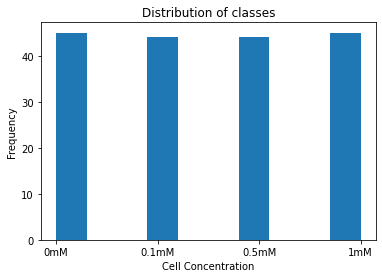

In [9]:
plt.hist(cell_concentration['condition'])
plt.title('Distribution of classes')
plt.xlabel('Cell Concentration')
plt.ylabel('Frequency')
plt.show()

Plotting raman spectra of randomly chosen samples

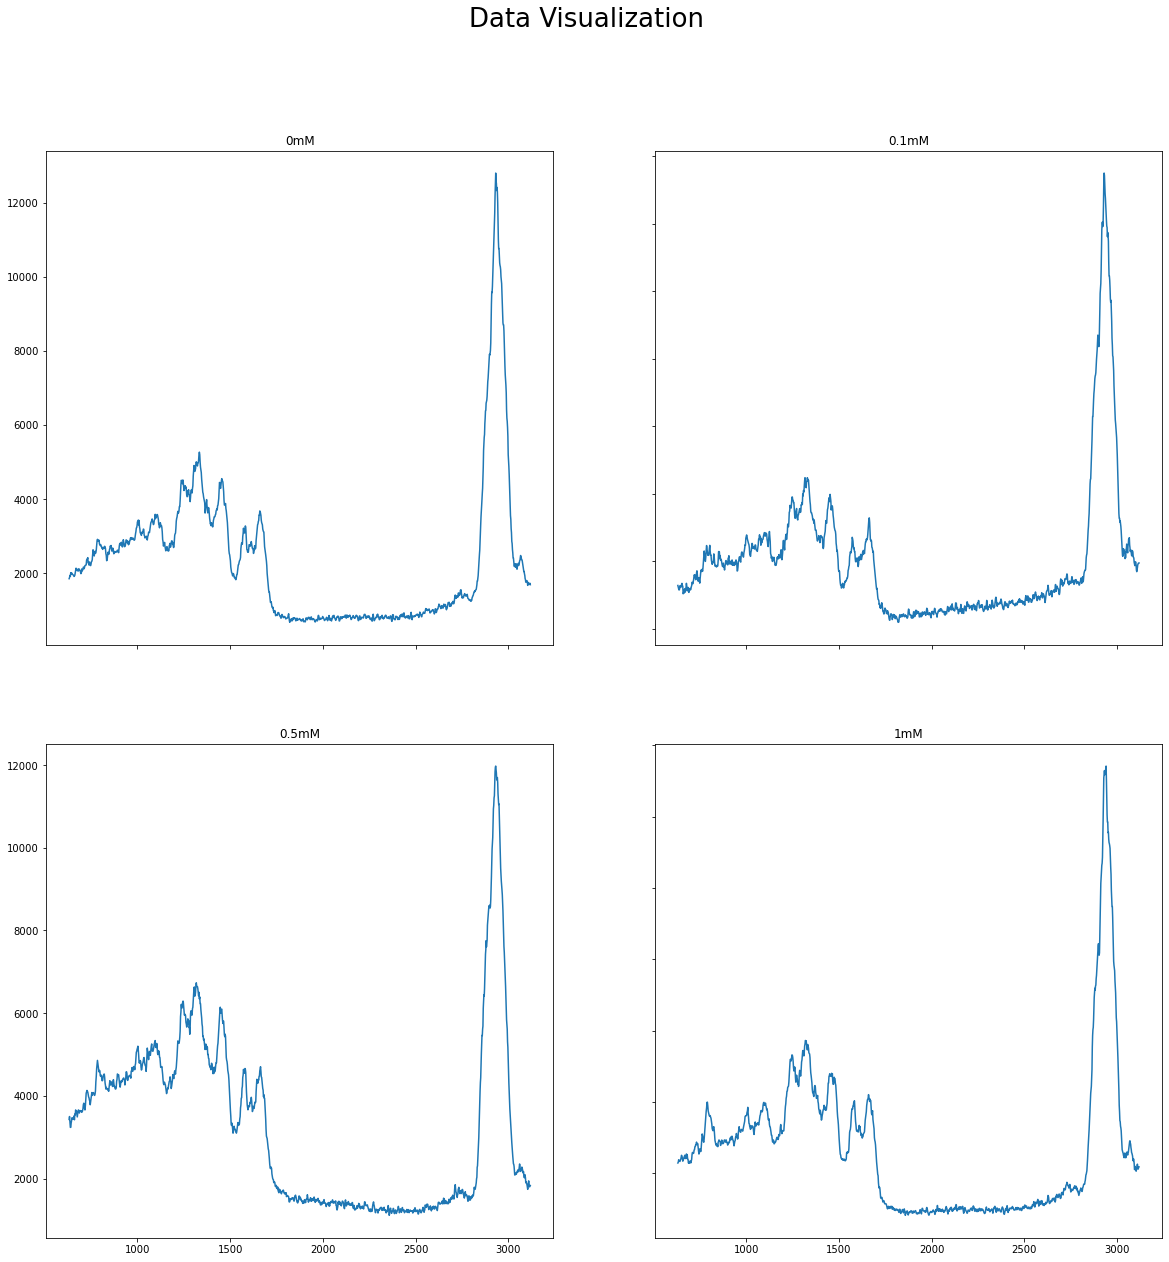

In [57]:
fig, axs = plt.subplots(2,2)

x = np.array(cell_concentration.columns)[1:].astype(float)
a = 0
b = 0

temp_ind = np.random.choice(np.where(cell_concentration['condition']=='0mM')[0])
axs[0, 0].plot(x, np.array(cell_concentration.iloc[temp_ind,:])[1:])
axs[0, 0].set_title('0mM')

temp_ind = np.random.choice(np.where(cell_concentration['condition']=='0.1mM')[0])
axs[0, 1].plot(x, np.array(cell_concentration.iloc[temp_ind,:])[1:])
axs[0, 1].set_title('0.1mM')


temp_ind = np.random.choice(np.where(cell_concentration['condition']=='0.5mM')[0])
axs[1, 0].plot(x, np.array(cell_concentration.iloc[temp_ind,:])[1:])
axs[1, 0].set_title('0.5mM')


temp_ind = np.random.choice(np.where(cell_concentration['condition']=='1mM')[0])
axs[1, 1].plot(x, np.array(cell_concentration.iloc[temp_ind,:])[1:])
axs[1, 1].set_title('1mM')

for ax in axs.flat:
    ax.label_outer()
    
fig.set_figwidth(20)
fig.set_figheight(20)

fig.suptitle('Data Visualization',fontsize=26)

plt.show()


Only some frequencies are biologically important (800 to 1800), lets visualize them

In [93]:
temp_x = np.array(cell_concentration.columns)[1:].astype(float)
x = temp_x[np.where(np.logical_and(temp_x>=800, temp_x<=1800))]


In [92]:
np.logical_or(temp_x>=800, temp_x<=1800)

array([ True,  True,  True, ...,  True,  True,  True])

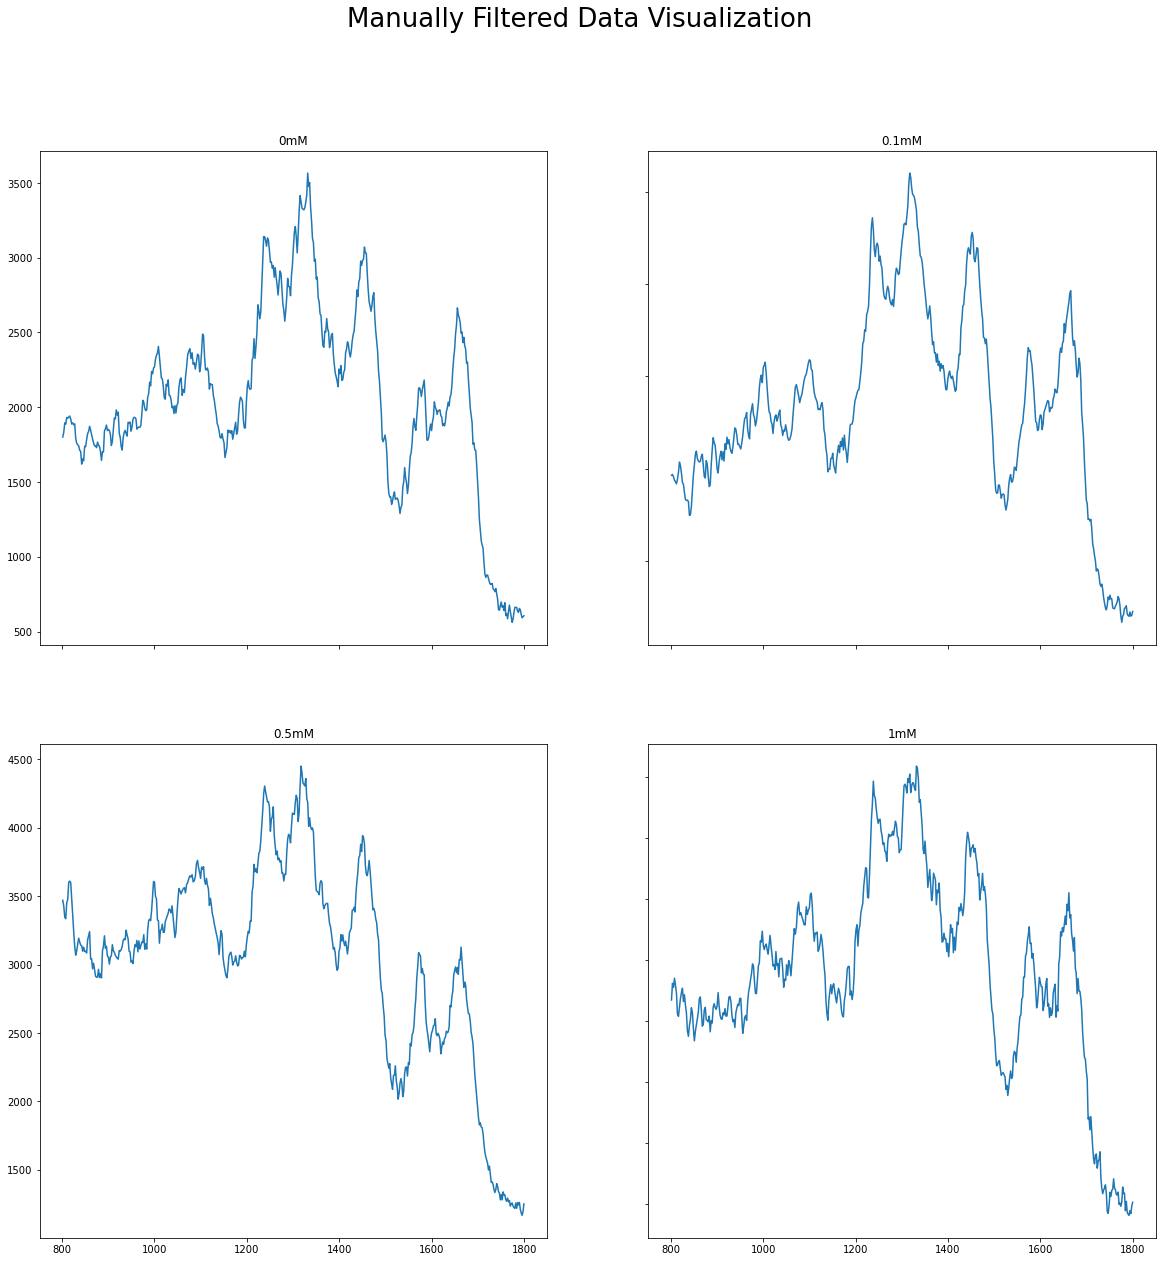

In [94]:
fig, axs = plt.subplots(2,2)

temp_x = np.array(cell_concentration.columns)[1:].astype(float)
x = temp_x[np.where(np.logical_and(temp_x>=800, temp_x<=1800))]

a = 0
b = 0

temp_ind = np.random.choice(np.where(cell_concentration['condition']=='0mM')[0])
axs[0, 0].plot(x, np.array(cell_concentration.loc[temp_ind,x.astype(str)]))
axs[0, 0].set_title('0mM')

temp_ind = np.random.choice(np.where(cell_concentration['condition']=='0.1mM')[0])
axs[0, 1].plot(x, np.array(cell_concentration.loc[temp_ind,x.astype(str)]))
axs[0, 1].set_title('0.1mM')


temp_ind = np.random.choice(np.where(cell_concentration['condition']=='0.5mM')[0])
axs[1, 0].plot(x, np.array(cell_concentration.loc[temp_ind,x.astype(str)]))
axs[1, 0].set_title('0.5mM')


temp_ind = np.random.choice(np.where(cell_concentration['condition']=='1mM')[0])
axs[1, 1].plot(x, np.array(cell_concentration.loc[temp_ind,x.astype(str)]))
axs[1, 1].set_title('1mM')

for ax in axs.flat:
    ax.label_outer()
    
fig.set_figwidth(20)
fig.set_figheight(20)

fig.suptitle('Manually Filtered Data Visualization',fontsize=26)

plt.show()
